In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from model.conf import *

In [108]:
model_df = pd.read_pickle(r"../Model_vars.pkl")
model_df = model_df.rolling(5, min_periods=1).mean()

model_df.head()

,tech_optimists,tech_pessimists,price,nf,technical_fraction,slope
0,19.00,16.000000,10.0000,465.000000,0.070000,0.000000
1,19.50,15.000000,10.0050,465.500000,0.069000,0.000000
2,19.00,13.333333,10.0100,467.666667,0.064667,0.008333
3,17.75,12.250000,10.0125,470.000000,0.060000,0.016250
4,17.20,11.600000,10.0160,471.200000,0.057600,0.019667


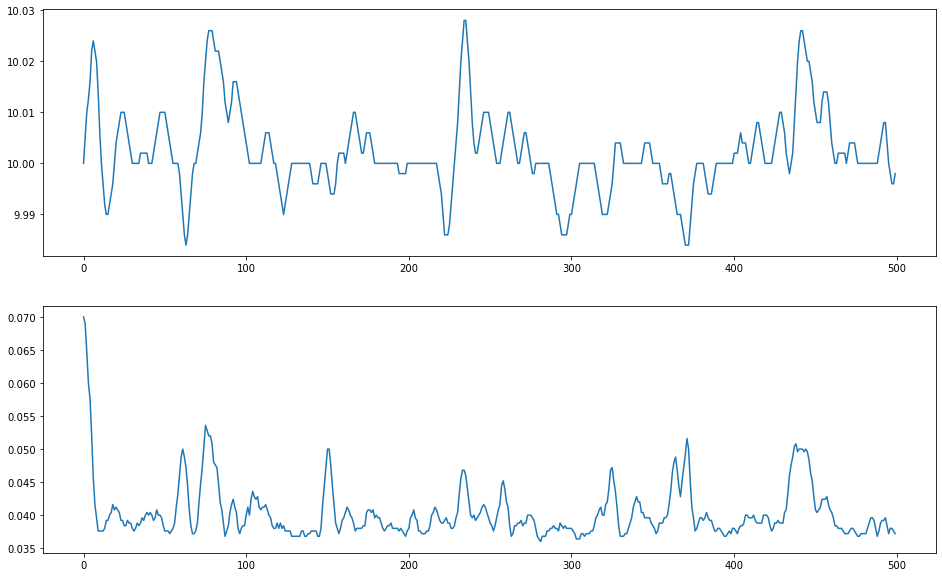

In [109]:
fig , ax = plt.subplots(2,1, figsize=(16, 10))

ax[0].plot(model_df.price)

ax[1].plot(model_df.technical_fraction)


In [110]:
edt = (model_df.tech_optimists - model_df.tech_pessimists) * tc  # excess technical demand
edf = model_df.nf * gamma * (pf - model_df.price)

model_df["edt"] = edt
model_df["edf"] = edf
model_df["ed"]  = edt + edf

model_df.head()

,tech_optimists,tech_pessimists,price,nf,technical_fraction,slope,edt,edf,ed
0,19.00,16.000000,10.0000,465.000000,0.070000,0.000000,0.060000,0.000000,0.060000
1,19.50,15.000000,10.0050,465.500000,0.069000,0.000000,0.090000,-0.023275,0.066725
2,19.00,13.333333,10.0100,467.666667,0.064667,0.008333,0.113333,-0.046767,0.066567
3,17.75,12.250000,10.0125,470.000000,0.060000,0.016250,0.110000,-0.058750,0.051250
4,17.20,11.600000,10.0160,471.200000,0.057600,0.019667,0.112000,-0.075392,0.036608


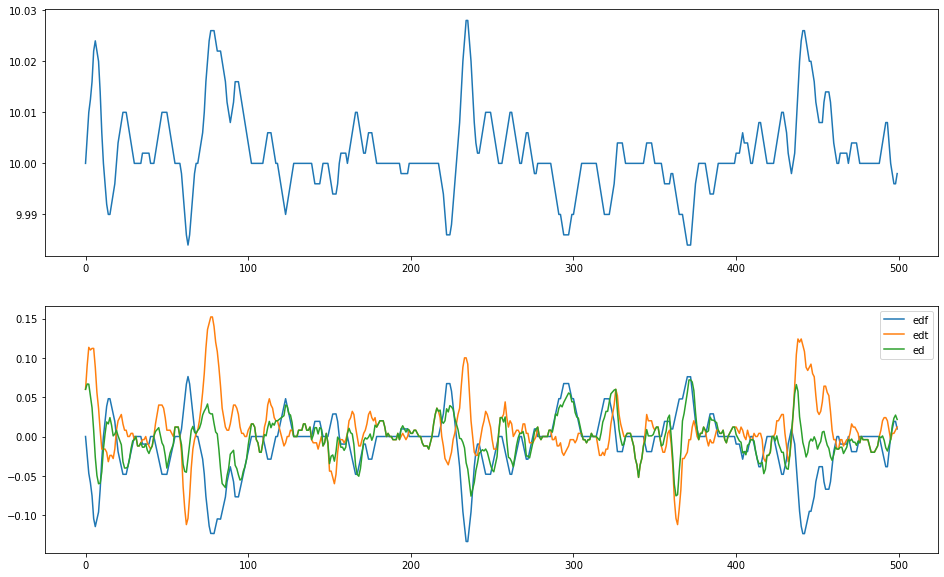

In [111]:
fig , ax = plt.subplots(2,1, figsize=(16, 10))

ax[0].plot(model_df.price)
ax[1].plot(model_df.edf, label="edf")
ax[1].plot(model_df.edt, label="edt")
ax[1].plot(model_df.ed, label="ed")
ax[1].legend()

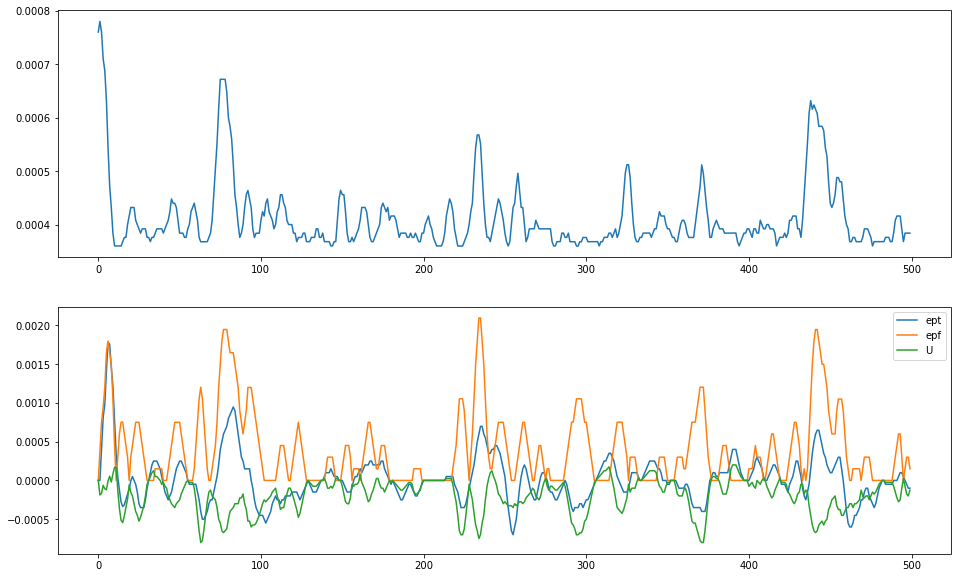

In [112]:
ept = (r + model_df.slope / v2) / model_df.price - R
epf = s * abs((model_df.price - pf) / model_df.price)

U = a3 * (ept - epf)
p_transition = v2 * model_df.tech_optimists / N * np.exp(U) * DT

fig, ax = plt.subplots(2, 1, figsize=(16,10))
ax[0].plot(p_transition)
ax[1].plot(ept, label="ept")
ax[1].plot(epf, label="epf")
ax[1].plot(U, label="U")
ax[1].legend()